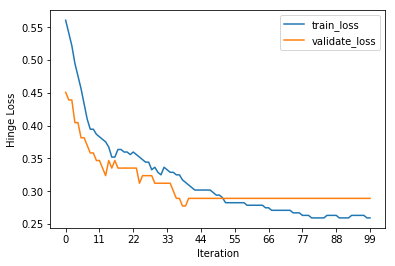

In [79]:
# write your code here
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np

# 读取数据集
mem=Memory('./mycache2')
@mem.cache
def get_data():
    data=load_svmlight_file('../data/australian_scale')
    return data[0],data[1]

# 求导函数
def grad(x, y, weight, C):
    tmp = np.zeros( weight.shape[0] )
    for i in range(0, x.shape[0]):
        if y[i] * np.dot( x[i] , weight ) < 1:
            tmp += -1 * y[i] * x[i]
    return weight + C * tmp

# 划分数据集
x,y=get_data()
y=y.reshape(690)
x=x.toarray()
x=np.c_[ x, np.ones(x.shape[0]) ]     # 在样本数据最后添加一整列的1，代替参数b
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=False)

# 参数初始化过程
w=np.random.rand(15)    # 初始化权重，维数为特征数+1，将b统一进w里面
yita = 0.0001
C = 1
ranges=range(0, 100)
loss=[]
loss_validate=[]

# 计算loss
def getLoss():
    # 算训练集loss值
    label=[]
    for i in range(0, x_train.shape[0]):
        if np.dot( x_train[i] , w ) > 0:     # 阈值为0
            label.append(1.)
        else:
            label.append(-1.)
    cur=0.
    for i in range(0, x_train.shape[0]):
        cur += max(0., 1.-y_train[i]*label[i])
    loss.append(cur/len(y_train))     # loss值除以样本数目
    # 算验证集loss值
    label_validate=[]
    for i in range(0, x_test.shape[0]):
        if np.dot( x_test[i] , w ) > 0:
            label_validate.append(1.)
        else:
            label_validate.append(-1.)
    cur=0.
    for i in range(0, x_test.shape[0]):
        cur += max(0, 1.-y_test[i]*label_validate[i])
    loss_validate.append(cur/len(y_test))
    
# 求精确率，召回率，F1值
precision = []     # 正确预测为正类的数目占所有预测为正类的比例
recall = []    # 正确预测为正类的数目占所有正类的比例
f1 = []     # 精确率和召回率的调和均值
def evaluate():
    tp = fn = fp = tn = 0.
    for i in range(0, x_test.shape[0]):
        if np.dot( x_test[i] , w ) > 0:
            if ( y_test[i] == +1 ):
                tp+=1.
            else:
                fp+=1.
        else:
            if ( y_test[i] == -1 ):
                tn+=1.
            else:
                fn+=1.
    precision.append( tp / (tp + fp) )
    recall.append( tp / (tp+fn) )
    f1.append( 2* tp / (2*tp + fp + fn) )
    
# 求准确率
accuracy=[]     # 正确分类的验证集样本数占总验证机样本数的比例
def assess():
    right=0.
    for i in range(0, x_test.shape[0]):
        if np.dot( x_test[i] , w ) > 0:
            if ( y_test[i] == +1 ):
                right+=1.
        else:
            if ( y_test[i] == -1 ):
                right+=1.
    accuracy.append(right / x_test.shape[0])
    
# 以下是梯度下降过程
for e in ranges:
    w -= yita * grad( x_train, y_train, w, C)
    # 算loss值
    getLoss()
    evaluate()
    assess()
    
# 可视化实验结果，loss curve
import matplotlib.pyplot as plt
figure1,=plt.plot(ranges,loss)
figure2,=plt.plot(ranges,loss_validate)
plt.xlabel('Iteration')
plt.ylabel('Hinge Loss')
plt.xticks(np.linspace(0, 99, 10))
plt.legend(handles=[figure1,figure2], labels=['train_loss','validate_loss'], loc='best')
plt.show()

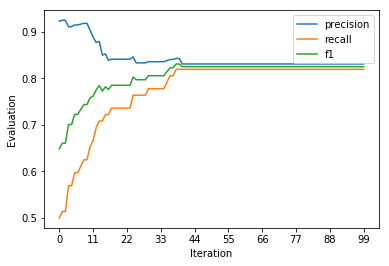

In [82]:
# 可视化实验结果，精确率，召回率，F1值
import matplotlib.pyplot as plt
figure1,=plt.plot(ranges,precision)
figure2,=plt.plot(ranges,recall)
figure3,=plt.plot(ranges,f1)
plt.xlabel('Iteration')
plt.ylabel('Evaluation')
plt.xticks(np.linspace(0, 99, 10))
plt.legend(handles=[figure1,figure2,figure3], labels=['precision','recall','f1'], loc='best')
plt.show()

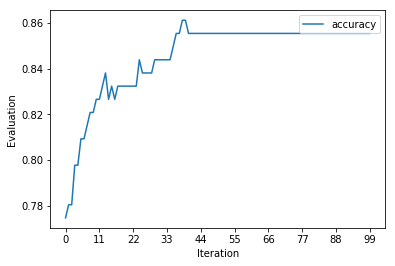

In [80]:
# 可视化实验结果，准确率
import matplotlib.pyplot as plt
figure1,=plt.plot(ranges,accuracy)
plt.xlabel('Iteration')
plt.ylabel('Evaluation')
plt.xticks(np.linspace(0, 99, 10))
plt.legend(handles=[figure1], labels=['accuracy'], loc='best')
plt.show()

In [81]:
accuracy[len(accuracy)-1]

0.8554913294797688